<div style="display: flex; flex-direction: column; align-items: center; text-align: center; font-family: 'Avenir Next LT Pro', sans-serif; padding: 50px; background-color: #f4f4f4; border-radius: 12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 50px; font-weight: bold; color: #222; margin-bottom: 10px;">Filologia Digital - Módulo V</h1>
    <h3 style="font-size: 30px; font-weight: bold; color: #555; max-width: 80%; line-height: 1.3;">
        Para além da edição: <span style="font-weight: normal; color: #666;">o digital na investigação linguística</span>
    </h3>
    <h4 style="font-size: 26px; font-weight: bold; color: #333; background-color: #e0e0e0; padding: 10px 20px; border-radius: 8px; margin-top: 25px;">Sessão 5 - Baseline Models</h4>
    <img src="https://filologiadigitalcl.wordpress.com/wp-content/uploads/2024/11/figure05.png?w=1024" 
         style="width: 80%; max-width: 600px; margin-top: 30px; border-radius: 10px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.15);">
</div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Setup projeto</a></li>
    <li><a href="#2">Pré-processamento simples</a></li>
    <li><a href="#3">Aplicação de ferramentas de Análise de Sentimentos</a></li>
        <ol>
            <li><a href="#3.1">TextBlob</a></li>
            <li><a href="#3.2">VADER Sentiment</a></li>
            <li><a href="#3.3">SentiWordNet (via NLTK)</a></li>
            <li><a href="#3.4">Afinn</a></li>
        </ol>
    <li><a href="#4">Comparação dos modelos</a></li>
    
    
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Setup projeto** 

##### Imports

In [33]:
import pandas as pd
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from collections import Counter
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import sys

# Caminho da pasta "root"
base_dir = Path(os.getcwd()).resolve()  # Ajuste se necessário, podes utilizar .parent para subir um nível
data_dir = base_dir / "Data"  # Diretório onde os dados serão armazenados
base_dir

WindowsPath('C:/Users/diogo/Desktop/Filologia_Digital-Modulo_V/Session4')

In [34]:
!pip install vaderSentiment afinn

  Using cached afinn-0.1-py3-none-any.whl



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Funções importantes

In [35]:
src_dir = base_dir / "src"
sys.path.append(str(src_dir))

# Importar os módulos
try:
    from common_functions import plot_confusion_matrix, print_classification_report, clean_text
except ImportError:
    print("Erro: Não foi possível importar algum módulo. Verifique se o caminho está correto.")

> ### 0. Leitura dos dados

In [36]:
DataSetsChosen = "Tweets_EN_sentiment"
Dataset_train, Dataset_test = DataSetsChosen + "_train.csv", DataSetsChosen + "_test.csv"
df_train, df_test = pd.read_csv(data_dir / Dataset_train), pd.read_csv(data_dir / Dataset_test)

df_train, df_test

(            tweet                                               text class
 0      1229448571                  some count sheep, you count cats    pos
 1      1230261573  We haven't been to Turning Stone in ages! Have...   pos
 2      1228861415                                           What up    pos
 3      1228489365                                          I'm good    pos
 4      1229800235  I know, wonder if USER is going to buy an apar...   pos
 ...           ...                                                ...   ...
 39931  1230130325                                    LOL- F, please    pos
 39932  1229250927  I wish I could do that too! But it ain't happe...   neg
 39933  1228710021                    I &lt;3 my boyfriend's family.    pos
 39934  1228100681                                               404    neg
 39935  1229022675  RT USER ok i can still tweet but admit i am a ...   pos
 
 [39936 rows x 3 columns],
            tweet                                          

# <a class='anchor' id='2'></a>

> # **2. Pré-processamento simples** 

Vamos apenas remover alguns eventuais links dos tweets com "https" ou "www", passar o texto para minúsculas e retirar stopwords.

In [37]:
# Descarregar stopwords do NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_test['clean_text'] = df_test['text'].astype(str).apply(clean_text, stop_words=stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Havia alguns valores nulos no texto
df_test.dropna(subset=['text'], inplace=True)
df_test

,tweet,text,class,clean_text
0,1229614408,G Night world,pos,g night world
1,1229158792,Morning all just got home from taking my daug...,pos,morning got home taking daughter doc's. want m...
2,1228398639,thanks for the follow - how are you connected ...,pos,"thanks follow - connected b&gc? board 6 years,..."
3,1229411644,re: Home Depot...hey! maybe we'll see you ther...,pos,re: home depot...hey! maybe see there... : )
4,1230107823,tak jsem poprve v zivote napsala zpravicku na ...,pos,tak jsem poprve v zivote napsala zpravicku na ...
...,...,...,...,...
9980,1228266179,Productive day today FTW! Bought/wrapped gifts...,pos,productive day today ftw! bought/wrapped gifts...
9981,1229022249,Thanks,pos,thanks
9982,1229969913,Nice! Thanks for the info,pos,nice! thanks info
9983,1230580122,"daaaaamn... i shoulda came down there, but you...",neg,"daaaaamn... shoulda came there, cant buy recor..."


Foi experimentado com e sem stopwords e foi decidido retirá-las para esta fase dos modelos baseline. Exemplo em que acharíamos que poderia ajudar não retirar mas não ajudou: 

"my bad": tweet 1229135196 -> os modelos todos erram a classificação deste tweet

- Com stopwords:

```
Os modelos todos erraram a classe verdadeira ao mesmo tempo em 784 das vezes. Ou seja, em 7.9% dos tweets do conjunto de teste.
Os modelos todos acertaram a classe verdadeira ao mesmo tempo em 6030 das vezes. Ou seja, em 60.4% dos tweets do conjunto de teste.
```

- Sem stopwords:

```
Os modelos todos erraram a classe verdadeira ao mesmo tempo em 912 das vezes. Ou seja, em 9.1% dos tweets do conjunto de teste.
Os modelos todos acertaram a classe verdadeira ao mesmo tempo em 6238 das vezes. Ou seja, em 62.5% dos tweets do conjunto de teste.
```

É um trade-off, mas optámos por garantir que os modelos concordassem mais, ou seja, do pior modelo continuar a concordar com os restantes (melhoramos a exatidão).

# <a class='anchor' id='3'></a>

> # **3. Aplicação de ferramentas de Análise de Sentimentos** 

# <a class='anchor' id='3.1'></a>

> ## **3.1 TextBlob** 

In [39]:
from textblob import TextBlob

def predict_textblob(text):
    analysis = TextBlob(text)
    return "pos" if analysis.sentiment.polarity >= 0 else "neg"

df_test['textblob_pred'] = df_test['clean_text'].apply(predict_textblob)

In [40]:
df_test

,tweet,text,class,clean_text,textblob_pred
0,1229614408,G Night world,pos,g night world,pos
1,1229158792,Morning all just got home from taking my daug...,pos,morning got home taking daughter doc's. want m...,pos
2,1228398639,thanks for the follow - how are you connected ...,pos,"thanks follow - connected b&gc? board 6 years,...",neg
3,1229411644,re: Home Depot...hey! maybe we'll see you ther...,pos,re: home depot...hey! maybe see there... : ),pos
4,1230107823,tak jsem poprve v zivote napsala zpravicku na ...,pos,tak jsem poprve v zivote napsala zpravicku na ...,pos
...,...,...,...,...,...
9980,1228266179,Productive day today FTW! Bought/wrapped gifts...,pos,productive day today ftw! bought/wrapped gifts...,pos
9981,1229022249,Thanks,pos,thanks,pos
9982,1229969913,Nice! Thanks for the info,pos,nice! thanks info,pos
9983,1230580122,"daaaaamn... i shoulda came down there, but you...",neg,"daaaaamn... shoulda came there, cant buy recor...",pos


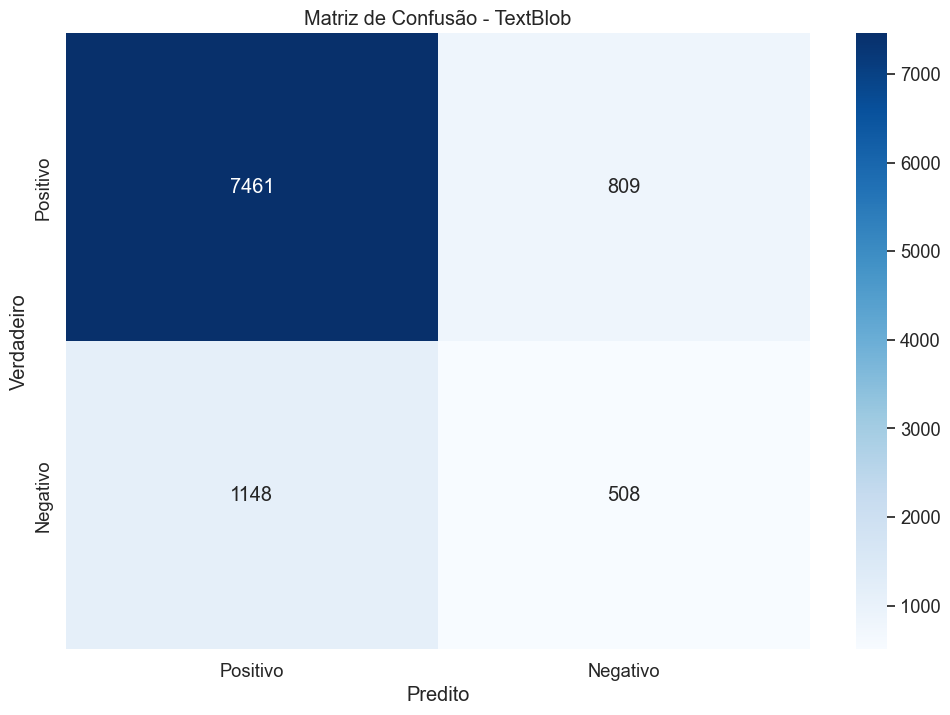

In [41]:
plot_confusion_matrix(df_test['class'], df_test['textblob_pred'], model_name="TextBlob")

In [42]:
print_classification_report(df_test['class'], df_test['textblob_pred'], model_name="TextBlob")


=== Relatório de Desempenho: TextBlob ===
Accuracy : 0.8028
Precisão : 0.8667
Recall   : 0.9022
F1-score : 0.8841

--- Relatório Detalhado ---
              precision    recall  f1-score   support

         neg       0.39      0.31      0.34      1656
         pos       0.87      0.90      0.88      8270

    accuracy                           0.80      9926
   macro avg       0.63      0.60      0.61      9926
weighted avg       0.79      0.80      0.79      9926



# <a class='anchor' id='3.2'></a>

> ## **3.2 VADER Sentiment** 

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def predict_vader(text):
    scores = analyzer.polarity_scores(text)
    return "pos" if scores['compound'] >= 0 else "neg"

df_test['vader_pred'] = df_test['clean_text'].apply(predict_vader)

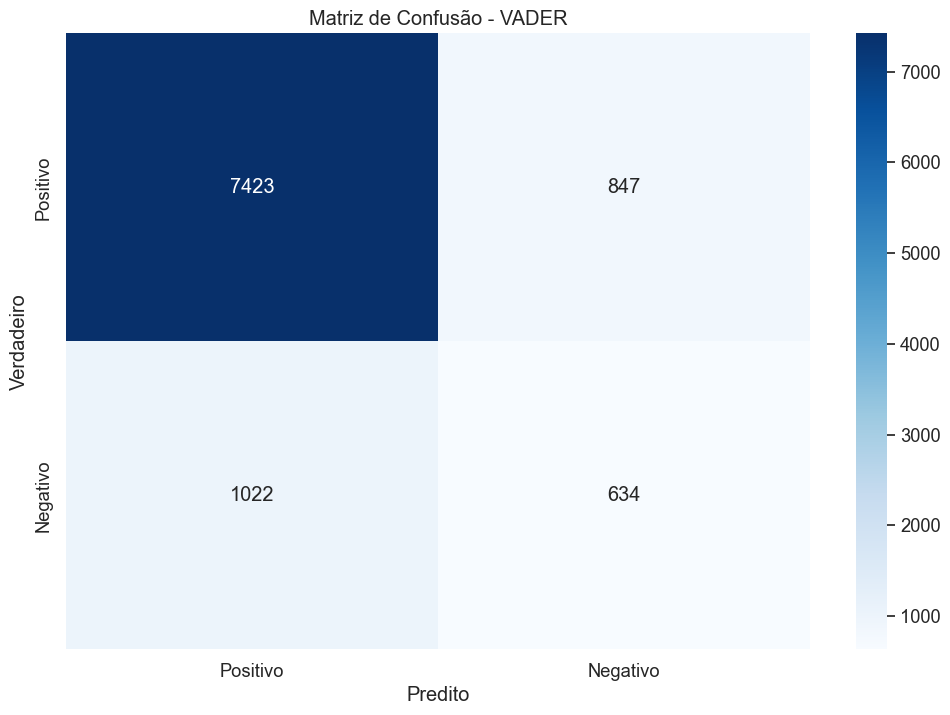

In [44]:
plot_confusion_matrix(df_test['class'], df_test['vader_pred'], model_name="VADER")

In [45]:
print_classification_report(df_test['class'], df_test['vader_pred'], model_name="VADER")


=== Relatório de Desempenho: VADER ===
Accuracy : 0.8117
Precisão : 0.8790
Recall   : 0.8976
F1-score : 0.8882

--- Relatório Detalhado ---
              precision    recall  f1-score   support

         neg       0.43      0.38      0.40      1656
         pos       0.88      0.90      0.89      8270

    accuracy                           0.81      9926
   macro avg       0.65      0.64      0.65      9926
weighted avg       0.80      0.81      0.81      9926



# <a class='anchor' id='3.3'></a>

> ## **3.3 SentiWordNet (via NLTK)** 

In [46]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
nltk.download('punkt_tab')
nltk.data.find('tokenizers/punkt_tab')
nltk.download('wordnet')
nltk.download('sentiwordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

https://medium.com/@nidhikayadav/sentiment-analysis-with-python-sentiwordnet-fd07ffc557

Vamos ter de tokenizar e utilizar [synsets](https://www.geeksforgeeks.org/nlp-synsets-for-a-word-in-wordnet/).

In [47]:
# Função para calcular a polaridade utilizando SentiWordNet
def predict_sentiwordnet(text):
    tokens = word_tokenize(text)
    sentiment_score = 0
    for word in tokens:
        # Tenta obter o synset do WordNet para a palavra
        synsets = wn.synsets(word)
        if synsets:
            # Usar o primeiro synset para a palavra
            senti_synset = swn.senti_synset(synsets[0].name())
            sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()

    return "pos" if sentiment_score >= 0 else "neg"

# Aplicar a função ao texto
df_test['sentiwordnet_pred'] = df_test['clean_text'].apply(predict_sentiwordnet)

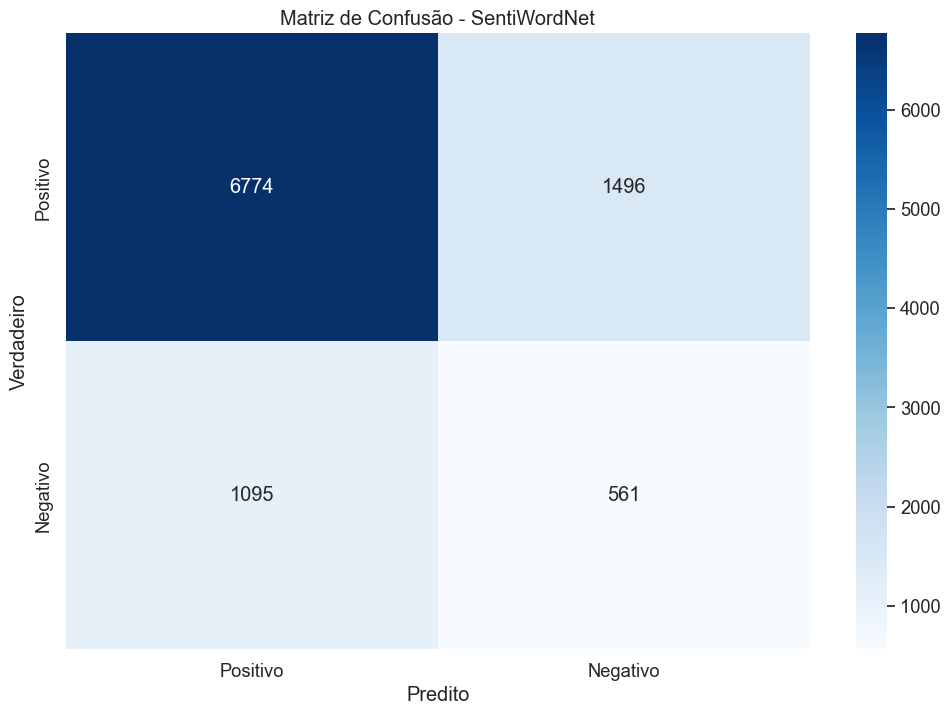


=== Relatório de Desempenho: SentiWordNet ===
Accuracy : 0.7390
Precisão : 0.8608
Recall   : 0.8191
F1-score : 0.8395

--- Relatório Detalhado ---
              precision    recall  f1-score   support

         neg       0.27      0.34      0.30      1656
         pos       0.86      0.82      0.84      8270

    accuracy                           0.74      9926
   macro avg       0.57      0.58      0.57      9926
weighted avg       0.76      0.74      0.75      9926



In [48]:
# Avaliar o desempenho
plot_confusion_matrix(df_test['class'], df_test['sentiwordnet_pred'], model_name="SentiWordNet")
print_classification_report(df_test['class'], df_test['sentiwordnet_pred'], model_name="SentiWordNet")

# <a class='anchor' id='3.4'></a>

> ## **3.4 Afinn** 

In [49]:
from afinn import Afinn

# Inicializar o analisador
afinn = Afinn()

# Função para prever o sentimento
def predict_afinn(text):
    score = afinn.score(text)  # devolve um valor float
    return "pos" if score >= 0 else "neg"

# Aplicar a função ao texto
df_test['afinn_pred'] = df_test['clean_text'].apply(predict_afinn)

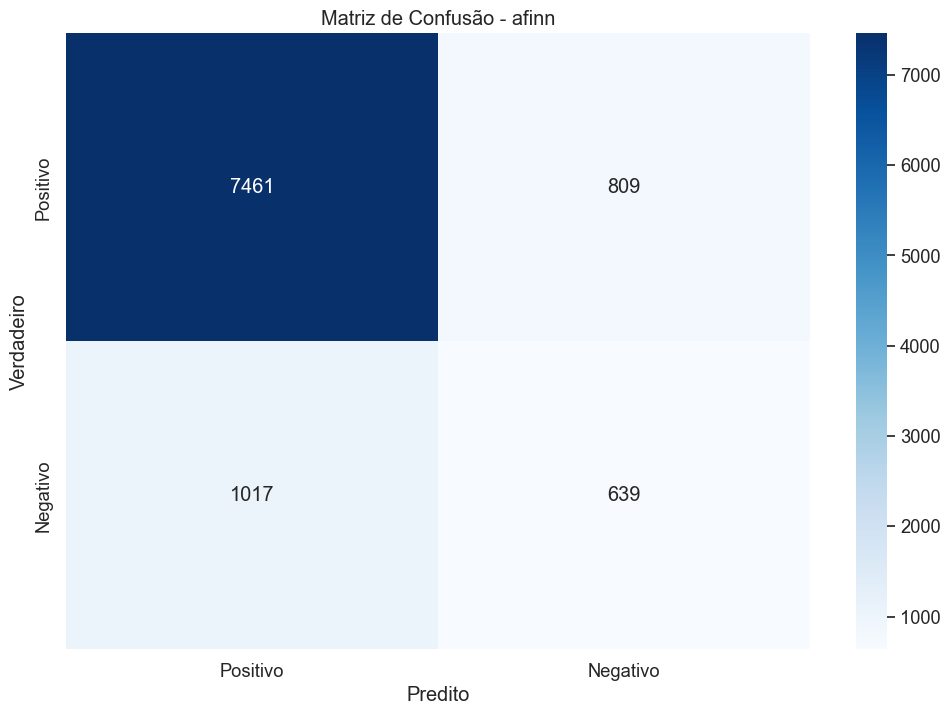


=== Relatório de Desempenho: afinn ===
Accuracy : 0.8160
Precisão : 0.8800
Recall   : 0.9022
F1-score : 0.8910

--- Relatório Detalhado ---
              precision    recall  f1-score   support

         neg       0.44      0.39      0.41      1656
         pos       0.88      0.90      0.89      8270

    accuracy                           0.82      9926
   macro avg       0.66      0.64      0.65      9926
weighted avg       0.81      0.82      0.81      9926



In [50]:
# Avaliar o desempenho
plot_confusion_matrix(df_test['class'], df_test['afinn_pred'], model_name="afinn")
print_classification_report(df_test['class'], df_test['afinn_pred'], model_name="afinn")

# <a class='anchor' id='4'></a>

> # **4. Comparação dos modelos** 

In [51]:
df_test

,tweet,text,class,clean_text,textblob_pred,vader_pred,sentiwordnet_pred,afinn_pred
0,1229614408,G Night world,pos,g night world,pos,pos,pos,pos
1,1229158792,Morning all just got home from taking my daug...,pos,morning got home taking daughter doc's. want m...,pos,pos,neg,pos
2,1228398639,thanks for the follow - how are you connected ...,pos,"thanks follow - connected b&gc? board 6 years,...",neg,pos,pos,pos
3,1229411644,re: Home Depot...hey! maybe we'll see you ther...,pos,re: home depot...hey! maybe see there... : ),pos,pos,pos,pos
4,1230107823,tak jsem poprve v zivote napsala zpravicku na ...,pos,tak jsem poprve v zivote napsala zpravicku na ...,pos,pos,pos,pos
...,...,...,...,...,...,...,...,...
9980,1228266179,Productive day today FTW! Bought/wrapped gifts...,pos,productive day today ftw! bought/wrapped gifts...,pos,pos,pos,pos
9981,1229022249,Thanks,pos,thanks,pos,pos,pos,pos
9982,1229969913,Nice! Thanks for the info,pos,nice! thanks info,pos,pos,pos,pos
9983,1230580122,"daaaaamn... i shoulda came down there, but you...",neg,"daaaaamn... shoulda came there, cant buy recor...",pos,pos,pos,pos


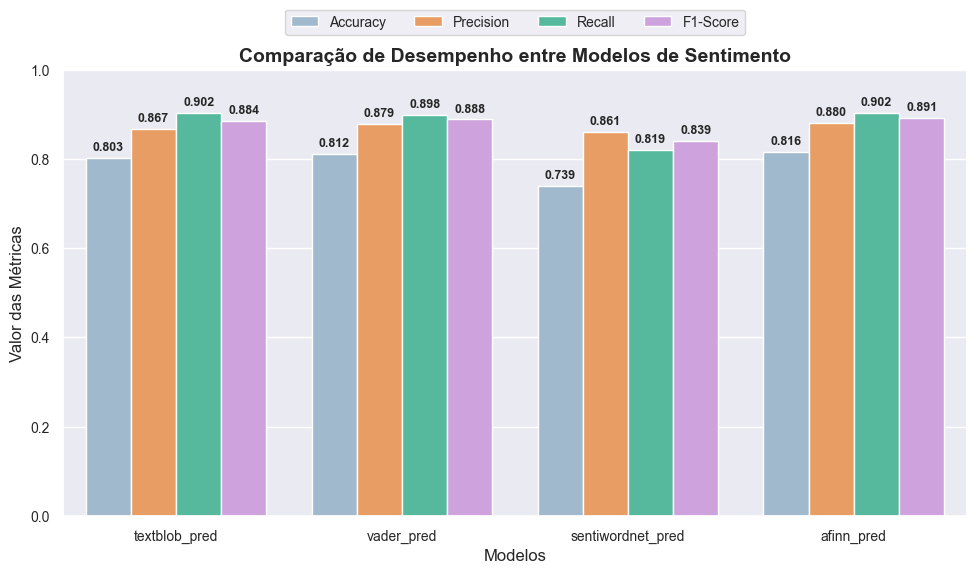

In [52]:
# Lista de modelos a comparar (todas as colunas exceto as que não são previsões)
models = [col for col in df_test.columns if col not in ['tweet', 'text', 'class', 'clean_text']]

# Inicialização dos dicionários para armazenar as métricas
accuracy_results = {}
precision_results = {}
recall_results = {}
f1_results = {}

# Cálculo das métricas para cada modelo
for model in models:
    accuracy_results[model] = accuracy_score(df_test['class'], df_test[model])
    precision_results[model] = precision_score(df_test['class'], df_test[model], pos_label="pos")
    recall_results[model] = recall_score(df_test['class'], df_test[model], pos_label="pos")
    f1_results[model] = f1_score(df_test['class'], df_test[model], pos_label="pos")

# Organizar os resultados num DataFrame
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_results.values(),
    'Precision': precision_results.values(),
    'Recall': recall_results.values(),
    'F1-Score': f1_results.values()
})

# Transformar para formato longo para facilitar visualização
metrics_df_long = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

custom_palette = ['#98BAD5', '#FD9A4D', '#45CAA5', '#D39AE6']

# Gráfico de barras agrupadas com a paleta personalizada
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_df_long, palette=custom_palette)

plt.title('Comparação de Desempenho entre Modelos de Sentimento', fontsize=14, weight='bold')
plt.ylabel('Valor das Métricas', fontsize=12)
plt.xlabel('Modelos', fontsize=12)

# Ajustar escala do eixo Y
plt.ylim(0, 1)

# Reduzir tamanho da fonte dos eixos
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adicionar os valores em cima de cada barra
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.01,
            s=f'{height:.3f}',
            ha='center',
            va='bottom',
            fontsize=9,
            weight='bold'
        )

# Alterar a posição da legenda
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=10)

plt.tight_layout()
plt.show()


**Conclusão:** De forma geral, todos os modelos aparentam bons resultados, mas se analisado de forma mais detalhada, estes modelos são piores que prever a moda (83.2%). Ou seja, se o modelo classificasse apenas a classe maioritária (pos), teria uma classificação de 83.2%, que é a distribuição dessa classe no conjunto de teste.

A fim de identificar alguns casos em que os modelos erram totalmente a classe verdadeira, vamos fazer uma pequena análise dos mesmos.

In [53]:
colunas_modelos = ['textblob_pred', 'vader_pred', 'sentiwordnet_pred', 'afinn_pred']

# Tweets com classe original 'pos' e todas as previsões 'neg' ou classe original 'neg' e todas as previsões 'pos'
class_all_neg_but_pos = df_test[(df_test['class'] == 'pos') & (df_test[colunas_modelos] == 'neg').all(axis=1)]
class_all_pos_but_neg = df_test[(df_test['class'] == 'neg') & (df_test[colunas_modelos] == 'pos').all(axis=1)]

very_bad_preds = pd.concat([class_all_neg_but_pos, class_all_pos_but_neg])
#very_bad_preds

# Tweets com classe original 'pos' e todas as previsões 'pos' ou classe original 'neg' e todas as previsões 'neg'
class_all_pos = df_test[(df_test['class'] == 'pos') & (df_test[colunas_modelos] == 'pos').all(axis=1)]
class_all_neg = df_test[(df_test['class'] == 'neg') & (df_test[colunas_modelos] == 'neg').all(axis=1)]
good_preds = pd.concat([class_all_pos, class_all_neg])

# Tweets restantes que são discordantes entre os modelos
ids_usados = pd.concat([very_bad_preds, good_preds])['tweet'].unique()
discordantes = df_test[~df_test['tweet'].isin(ids_usados)]
discordantes

,tweet,text,class,clean_text,textblob_pred,vader_pred,sentiwordnet_pred,afinn_pred
1,1229158792,Morning all just got home from taking my daug...,pos,morning got home taking daughter doc's. want m...,pos,pos,neg,pos
2,1228398639,thanks for the follow - how are you connected ...,pos,"thanks follow - connected b&gc? board 6 years,...",neg,pos,pos,pos
6,1229006041,Pownce is shutting down. URL So close yet so far,neg,pownce shutting down. close yet far,neg,pos,pos,pos
12,1228085717,#mcl2 Ed printed out his slides for us. Very a...,pos,"#mcl2 ed printed slides us. analog, thoughtful...",pos,pos,neg,pos
14,1230437803,Observer &gt;&gt; Brees canÕt escape talk of r...,neg,observer &gt;&gt; brees canõt escape talk reco...,pos,pos,neg,neg
...,...,...,...,...,...,...,...,...
9973,1229220825,od pocetka 1 po 1,pos,od pocetka 1 po 1,pos,neg,pos,pos
9974,1229143150,298 on Wii bowling..........what a bummer....s...,neg,298 wii bowling..........what bummer....should...,pos,neg,neg,neg
9975,1230940342,Watching Merry Christmas Drake & Josh w/ Brean...,pos,watching merry christmas drake & josh w/ brean...,pos,pos,neg,pos
9976,1230492525,good morning. Long time since I have been on....,neg,good morning. long time since on. computer nas...,neg,neg,neg,pos


In [54]:
len(discordantes)+len(good_preds)+len(very_bad_preds) == len(df_test)

True

In [55]:
print(f"Os modelos todos erraram a classe verdadeira ao mesmo tempo em \033[1m{len(very_bad_preds)}\033[0m das vezes. Ou seja, em \033[1m{round(len(very_bad_preds)/len(df_test), 3)*100}%\033[0m dos tweets do conjunto de teste.")
print(f"Os modelos todos acertaram a classe verdadeira ao mesmo tempo em \033[1m{len(good_preds)}\033[0m das vezes. Ou seja, em \033[1m{round(len(good_preds)/len(df_test), 3)*100}%\033[0m dos tweets do conjunto de teste.")

Os modelos todos erraram a classe verdadeira ao mesmo tempo em 895 das vezes. Ou seja, em 9.0% dos tweets do conjunto de teste.
Os modelos todos acertaram a classe verdadeira ao mesmo tempo em 6195 das vezes. Ou seja, em 62.4% dos tweets do conjunto de teste.


Com um valor tão alto de 9.0% dos tweets podemos concluir para já, só com os baselines, que são tweets mais difíceis de serem classificados.

Vamos ver alguns destes casos em que o modelo classifica muito incorretamente para ver se as frases são difíceis de serem detectadas.

In [56]:
class_all_pos_but_neg[['tweet', 'text', 'class']].head(10)

,tweet,text,class
38,1229244258,Working,neg
54,1228348300,supposed to be having dinner with the family a...,neg
79,1229042405,i wish the Dr Who DVD sets were cheaper. Or I...,neg
80,1229321209,Im supposed to be done by now,neg
82,1229399708,i miss shawn elliot and gfw radio wheres ...,neg
83,1228414271,a canon a1000 but i miss my old one it was bet...,neg
105,1229915356,I wish I was born in the time of the big bans...,neg
117,1229802409,i dont know wat to do with myself today... wis...,neg
144,1227633870,very cool we must hook up next time I'm in tow...,neg
160,1230102070,another lockup of my nfs server,neg


In [57]:
class_all_neg_but_pos[['tweet', 'text', 'clean_text', 'class']].head(10)

,tweet,text,clean_text,class
116,1230178833,"No you are correct, the problem is mine. Sorry...","correct, problem mine. sorry misunderstanding!",pos
133,1229709600,"i woke up at 2230, and plan on spending my ent...","woke 2230, plan spending entire night working ...",pos
219,1229070563,just wrapped the Left 4 Dead shoot. We had a b...,"wrapped left 4 dead shoot. blast ""boomer's day...",pos
236,1229119456,no I have to talk to Chris and he's sleeping ...,talk chris sleeping wore poor guy out!,pos
258,1229135196,my bad,bad,pos
368,1229206711,"Mac OS 10.5.6 is out, hoorah . Funny how I lik...","mac os 10.5.6 out, hoorah . funny like mac os ...",pos
392,1228391490,can't wait till we get more snow so I can bui...,can't wait till get snow build one - ill take ...,pos
393,1228962805,"Very much so! My dad's an extra (Steve, N9OI)....","much so! dad's extra (steve, n9oi)...and said ...",pos
408,1229586922,"burrito...when all else fails, get a burrito.","burrito...when else fails, get burrito.",pos
477,1229038937,"My friend is in Chicago for week, downtown, po...","friend chicago week, downtown, poor bastard.",pos


Apenas observando um pequeno conjunto de 10 tweets em que os modelos classificam todos como negativo, mas que a classe é positivo, não é possível detectar um padrão claro. Isto deve-se ao facto do corpus utilizado ser de tweets e estes serem escritos de forma informal e que muitas vezes contêm ironia ou sentimentos "mistos".

Ainda assim, é importante destacar três destes tweets do head que remetem para situações diferentes:

| tweet | text                           | true_class | pred_class (all models) |
|-------|--------------------------------|-------|------------|
| 1229038937     | My friend is in Chicago for week, downtown, poor bastard.| pos   | neg        |
| 1229135196     | my bad   | pos   | neg        |
| 1229586922     | burrito...when all else fails, get a burrito.   | pos   | neg        |
| 1229244258 | Working | neg | pos

- Tweet 1229038937: é "claramente" um tweet com um tom irónico
- Tweet 1229135196: mostra um tom de arrependimento, mas que os modelos não conseguem detectar por ser curto e uma das palavras ser "bad"; **NOTA**: foi testado com e sem stopwords e os 4 modelos erravam nas 2 situações -> "my bad"/"bad" apenas
- Tweet 1229586922: parece ser algo mais dramático e com palavras negativas, mas que na verdade mostra alegria no "burrito"

Achámos interessante que um tweet apenas com "Working" tem classe original negativa e em que todos os modelos classificaram como positivo.


In [58]:
df_test[df_test['text'].str.contains('gay', case=False, na=False)]

,tweet,text,class,clean_text,textblob_pred,vader_pred,sentiwordnet_pred,afinn_pred
17,1229199512,no! my phone is just actin gay,neg,no! phone actin gay,pos,pos,neg,neg
2714,1229763303,dOMG just red-ringed of DEATHHHHHHHHHH!!! and ...,neg,domg red-ringed deathhhhhhhhhh!!! jeremy bragi...,pos,pos,pos,pos
4388,1230874784,It's gonna be cold on Saturday. That's Gays v...,neg,gonna cold saturday. that's gays vs. mormons k...,pos,neg,pos,pos
4442,1229962539,"Love You, Man, Not in Gay Way or Anything",pos,"love you, man, gay way anything",pos,pos,pos,pos
4787,1230074528,I'm in Houston's gay neighborhood and found th...,pos,houston's gay neighborhood found this. oh irony!,pos,neg,pos,neg
5546,1230670947,what happens when you run out of Word of the G...,pos,happens run word gay words.,pos,pos,pos,pos
5602,1229220137,Playin apples to apples with the best neighbor...,pos,playin apples apples best neighbors & gaybos e...,pos,pos,pos,pos
7218,1230148353,"Apparently philip rivers is the ""main passer g...",pos,"apparently philip rivers ""main passer guy"" cha...",pos,pos,pos,pos
7414,1229705430,Cute Idea Of The Day: Every time you see a rai...,pos,cute idea day: every time see rainbow means ga...,pos,pos,pos,pos
